## Diabetes Dataset

**Diabetes 130-US hospitals for years 1999-2008 Data Set**  
  
Dataset can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 70)
%matplotlib inline

### Read Data

In [2]:
diabetes_data = pd.read_csv('dataset_diabetes/diabetic_data.csv')
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Handle missing values

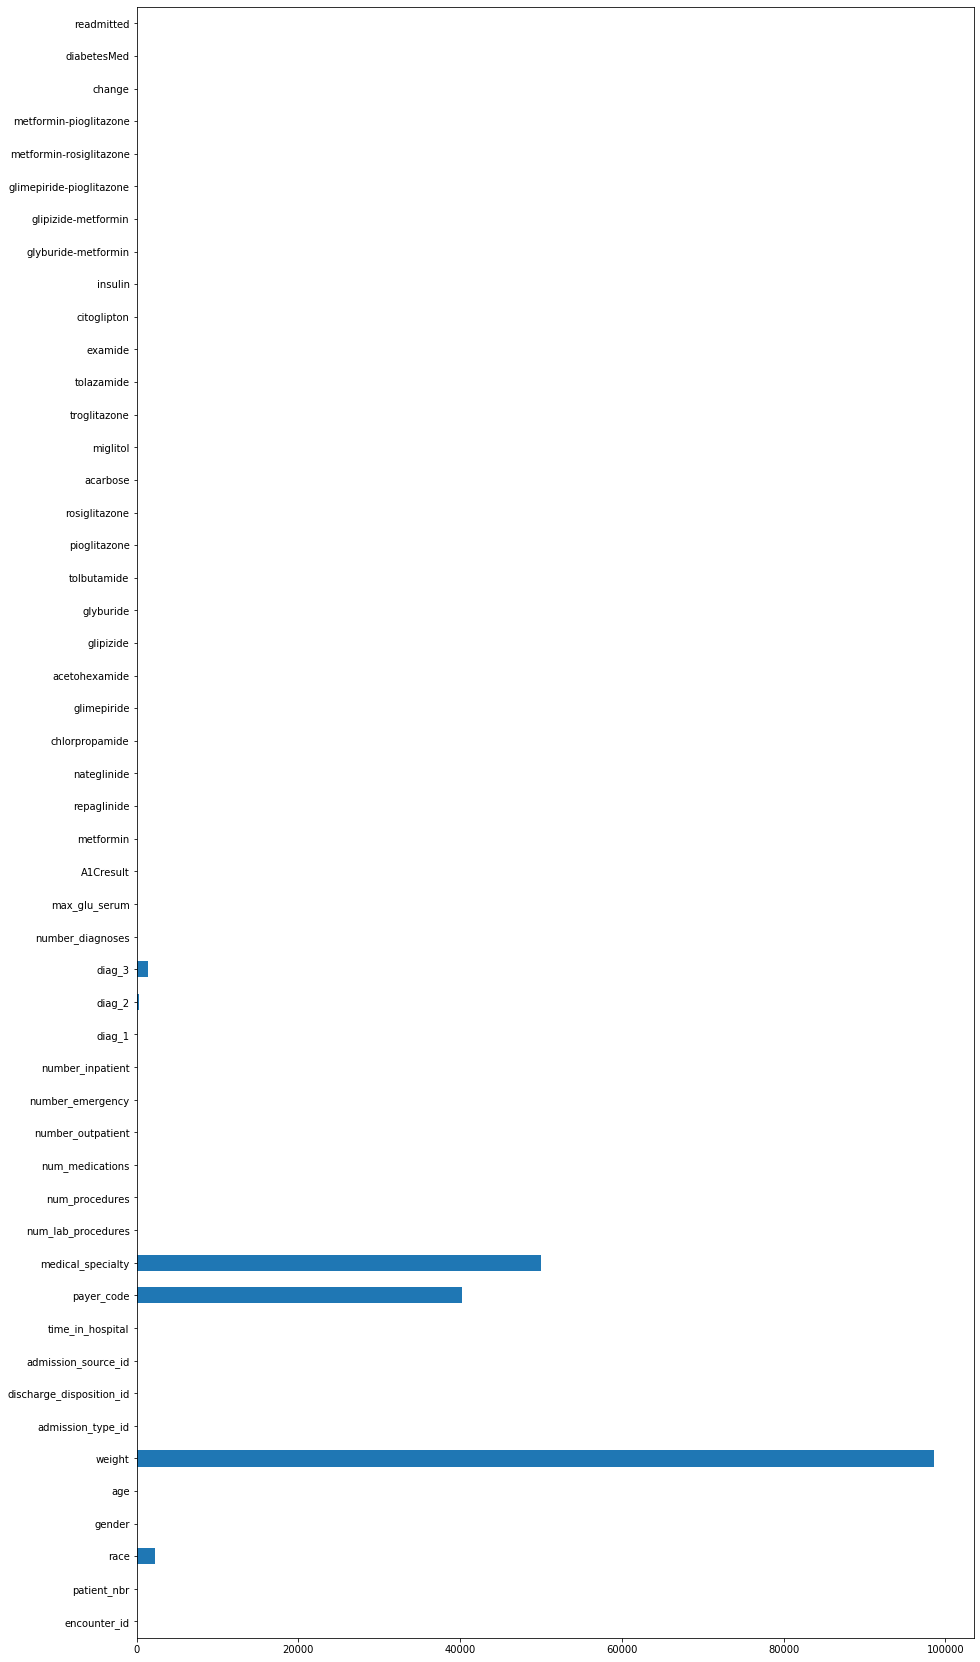

In [3]:
diabetes_data = diabetes_data.replace('?', np.nan)
diabetes_data.isnull().sum().plot(kind='barh', figsize=(15,30))

* `weight`, `medical_specialty` and `payer_code` has a very high number of missing values.
* `weight` has around 90% missing values, so it can be dropped.
* `medical_specialty` and `payer_code` are categorical in nature, so they might increase the dimensionality and probably won't influence our data much, so they can be dropped.
* Other identification features can be dropped as they don't influence our final prediction
* `race` has a very low number of missing values, it can be converted to 'UNK'
* `diag` nan values can be converted to their mean or median values

Dropping `weight`, `medical_specialty` and `payer_code`

In [4]:
diabetes_data.drop(['weight', 'medical_specialty', 'payer_code'], axis=1, inplace=True)

Dropping Identification Columns

In [5]:
diabetes_data.drop(['encounter_id', 'patient_nbr', 'admission_type_id',
                    'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)
diabetes_data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Categorizing `diag` columns

* Some of `diag_1`, `diag_2` and `diag_3` have non numeric values
* These values are converted into **Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others** according to their range

In [6]:
diag_cols = ['diag_1','diag_2','diag_3']

def handle_diag(df):
    for col in diag_cols:
        df[col] = df[col].str.replace('E','-')
        df[col] = df[col].str.replace('V','-')
        df[col] = df[col].replace(np.nan, '250')
        condition = df[col].str.contains('250')
        df.loc[condition,col] = '250'

    df[diag_cols] = df[diag_cols].astype(float)

    # diagnosis grouping
    for col in diag_cols:
        df['temp']=np.nan

        condition = df[col]==250
        df.loc[condition,'temp']='Diabetes'

        condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
        df.loc[condition,'temp']='Circulatory'

        condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
        df.loc[condition,'temp']='Respiratory'

        condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
        df.loc[condition,'temp']='Digestive'

        condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
        df.loc[condition,'temp']='Genitourinary'

        condition = (df[col]>=800) & (df[col]<=999)
        df.loc[condition,'temp']='Injury'

        condition = (df[col]>=710) & (df[col]<=739)
        df.loc[condition,'temp']='Muscoloskeletal'

        condition = (df[col]>=140) & (df[col]<=239)
        df.loc[condition,'temp']='Neoplasms'

        condition = df[col]==0
        df.loc[condition,col]='?'
        df['temp']=df['temp'].fillna('Others')
        condition = df['temp']=='0'
        df.loc[condition,'temp']=np.nan
        df[col]=df['temp']
        df.drop('temp',axis=1,inplace=True)
    
    return df[diag_cols]

diabetes_data[diag_cols] = handle_diag(diabetes_data)
diabetes_data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,Diabetes,Diabetes,Diabetes,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Convert Drugs and Tests columns to numeric values

* Drugs mentioned in our data have values **No**, **Steady**, **Up**, **Down**
* This probably means the dosage of particular drug provided
* These values can be replaced with numerical values 0, 1, 2, -1 for **No**, **Steady**, **Up**, **Down** respectively
* We are replacing them with numerical values, as it is practically not feasible to convert them into categoricall values
* **NOTE** This will change **No** values in `change` and `diabetesMed` as well
* Ch values in `change` are replaced with 1
* Yes values in `diabetesMed` are replaced with 1 as well

In [7]:
replace_dict = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': -1,
    'Ch': 1,
    'Yes': 1
}

diabetes_data = diabetes_data.replace(replace_dict)
diabetes_data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,Diabetes,Diabetes,Diabetes,1,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,Others,Diabetes,Others,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,Others,Diabetes,Others,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO


In [8]:
diabetes_data['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [9]:
diabetes_data['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

* `max_glu_serum` has values **None, Normal, >200, >300**
* `A1Cresult` has values **None, Normal, >7, >8**
* These values can be converted to -3, 1, 2, 3 respectively
* The **None** value is converted to -3 because we want it to be treated as an outlier or out of range value

In [10]:
replace_dict_tests = {
    'None': -2,
    'Norm': 1,
    '>200': 2,
    '>300': 3,
    '>7': 2,
    '>8': 3
}
test_cols = ['max_glu_serum', 'A1Cresult']

diabetes_data[test_cols] = diabetes_data[test_cols].replace(replace_dict_tests)

### Convert age ranges to single values

* `age` column has values in a range
* We can replace it with the mean of this range

In [11]:
def mean_age(age):
    low_age = str(age)[1:-1].split('-')[0]
    high_age = str(age)[1:-1].split('-')[1]
    return int(low_age) + 5

diabetes_data['age'] = diabetes_data['age'].apply(mean_age)
diabetes_data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,1,41,0,1,0,0,0,Diabetes,Diabetes,Diabetes,1,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,Caucasian,Female,15,3,59,0,18,0,0,0,Others,Diabetes,Others,9,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,>30
2,AfricanAmerican,Female,25,2,11,5,13,2,0,1,Others,Diabetes,Others,6,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,Caucasian,Male,35,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,NO
4,Caucasian,Male,45,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO


### One Hot Encode `race` column

In [12]:
diabetes_data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Replacing NaN values with Other category in `race`

In [13]:
diabetes_data['race'] = diabetes_data['race'].replace(np.nan, 'Other')

Getting Categorical columns for race

In [14]:
diabetes_data = pd.concat([pd.get_dummies(diabetes_data['race'], drop_first=True).astype(np.uint8),
                           diabetes_data.drop('race', axis=1)], axis=1)
diabetes_data.head()

,Asian,Caucasian,Hispanic,Other,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,1,0,0,Female,5,1,41,0,1,0,0,0,Diabetes,Diabetes,Diabetes,1,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,0,1,0,0,Female,15,3,59,0,18,0,0,0,Others,Diabetes,Others,9,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,>30
2,0,0,0,0,Female,25,2,11,5,13,2,0,1,Others,Diabetes,Others,6,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,0,1,0,0,Male,35,2,44,1,16,0,0,0,Others,Diabetes,Circulatory,7,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,NO
4,0,1,0,0,Male,45,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO


### One Hot Encode `diag` and `gender` columns

Categorizing Gender and dropping Invalid gender as there are only 3 such rows

In [15]:
diabetes_data = diabetes_data.replace({'Female': 0, 'Male': 1})
diabetes_data = diabetes_data.replace('Unknown/Invalid', np.nan).dropna(axis = 0)
diabetes_data['gender'] = diabetes_data['gender'].astype(np.uint8)

Getting categorical values for `diag_1`, `diag_2` and `diag_3`

In [16]:
for col in diag_cols:
    diabetes_data = pd.concat([pd.get_dummies(diabetes_data[col], prefix=col, drop_first=True).astype(np.uint8),
                               diabetes_data.drop(col, axis=1)], axis=1)
    
diabetes_data.head()

,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Muscoloskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Muscoloskeletal,diag_2_Neoplasms,diag_2_Others,diag_2_Respiratory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Muscoloskeletal,diag_1_Neoplasms,diag_1_Others,diag_1_Respiratory,Asian,Caucasian,Hispanic,Other,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,5,1,41,0,1,0,0,0,1,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,15,3,59,0,18,0,0,0,9,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,>30
2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,25,2,11,5,13,2,0,1,6,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.0,35,2,44,1,16,0,0,0,7,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,NO
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1.0,45,1,51,0,8,0,0,0,5,-2,-2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,NO


### Drop unnecessary columns

Dropping columns `citoglipton` and `examide` as they have only one same value for whole dataset

In [17]:
scalable_cols = ['age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [18]:
diabetes_data = diabetes_data.drop(['citoglipton', 'examide'], axis=1)

### Binarize `readmitted` column

Converting our prediction into binary values of Readmitted or Not Readmitted i.e. 0 and 1

In [19]:
diabetes_data['readmitted'].value_counts()

NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [20]:
diabetes_data = diabetes_data.replace({'NO': 0, '>30': 1, '<30': 1})
diabetes_data['readmitted'] = diabetes_data['readmitted'].astype(np.uint8)

Numerical Description of our preprocessed dataset

In [21]:
diabetes_data.describe()

,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Muscoloskeletal,diag_3_Neoplasms,diag_3_Others,diag_3_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Muscoloskeletal,diag_2_Neoplasms,diag_2_Others,diag_2_Respiratory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Muscoloskeletal,diag_1_Neoplasms,diag_1_Others,diag_1_Respiratory,Asian,Caucasian,Hispanic,Other,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.00000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,0.182581,0.038619,0.065643,0.019113,0.018818,0.018238,0.287904,0.072305,0.129241,0.040978,0.082309,0.02384,0.017334,0.025029,0.261451,0.107062,0.086259,0.093108,0.050284,0.068512,0.048711,0.033735,0.179525,0.141731,0.006299,0.747806,0.020017,0.037106,0.462398,65.966854,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649,-1.802964,-1.299372,0.195592,0.015320,0.006928,0.000884,0.050411,0.000010,0.121213,0.101550,0.000226,0.071981,0.062577,0.003066,0.000295,0.000029,0.000393,0.405481,0.006898,0.000128,0.000010,0.000020,0.000010,0.461946,0.770034,0.460894
std,0.386325,0.192686,0.247658,0.136923,0.135883,0.133813,0.452788,0.258994,0.335469,0.198239,0.274836,0.15255,0.130515,0.156213,0.439427,0.309194,0.280748,0.290586,0.218530,0.252624,0.215265,0.180548,0.383793,0.348776,0.079116,0.434274,0.140059,0.189022,0.498587,15.941022,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578,0.857248,1.602571,0.435441,0.134654,0.086993,0.031956,0.241060,0.003135,0.364226,0.343921,0.015032,0.271511,0.252725,0.057551,0.020792,0.005430,0.020312,0.838808,0.084416,0.011302,0.003135,0.004433,0.003135,0.498552,0.420813,0.498471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,-2.000000,-2.000000,0.000000,0.000000,0

Let's check if there is any correlation between drug dosages

In [22]:
diabetes_data.columns

Index(['diag_3_Diabetes', 'diag_3_Digestive', 'diag_3_Genitourinary',
       'diag_3_Injury', 'diag_3_Muscoloskeletal', 'diag_3_Neoplasms',
       'diag_3_Others', 'diag_3_Respiratory', 'diag_2_Diabetes',
       'diag_2_Digestive', 'diag_2_Genitourinary', 'diag_2_Injury',
       'diag_2_Muscoloskeletal', 'diag_2_Neoplasms', 'diag_2_Others',
       'diag_2_Respiratory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Genitourinary', 'diag_1_Injury', 'diag_1_Muscoloskeletal',
       'diag_1_Neoplasms', 'diag_1_Others', 'diag_1_Respiratory', 'Asian',
       'Caucasian', 'Hispanic', 'Other', 'gender', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 

In [23]:
drugs = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 
         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
         'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
         'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 
         'glipizide-metformin', 'glimepiride-pioglitazone', 
         'metformin-rosiglitazone', 'metformin-pioglitazone']

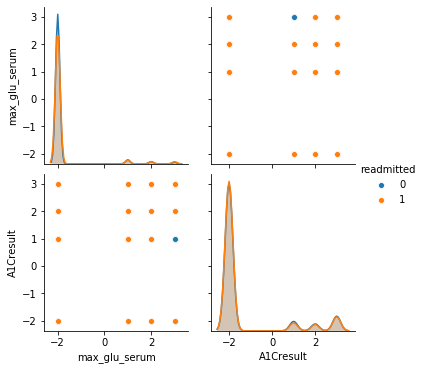

In [24]:
sns.pairplot(diabetes_data[['max_glu_serum', 'A1Cresult'] + ['readmitted']], hue='readmitted')

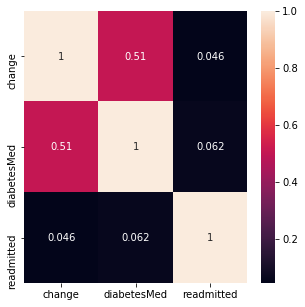

In [25]:
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(diabetes_data[['change', 'diabetesMed', 'readmitted']].corr(), annot=True)

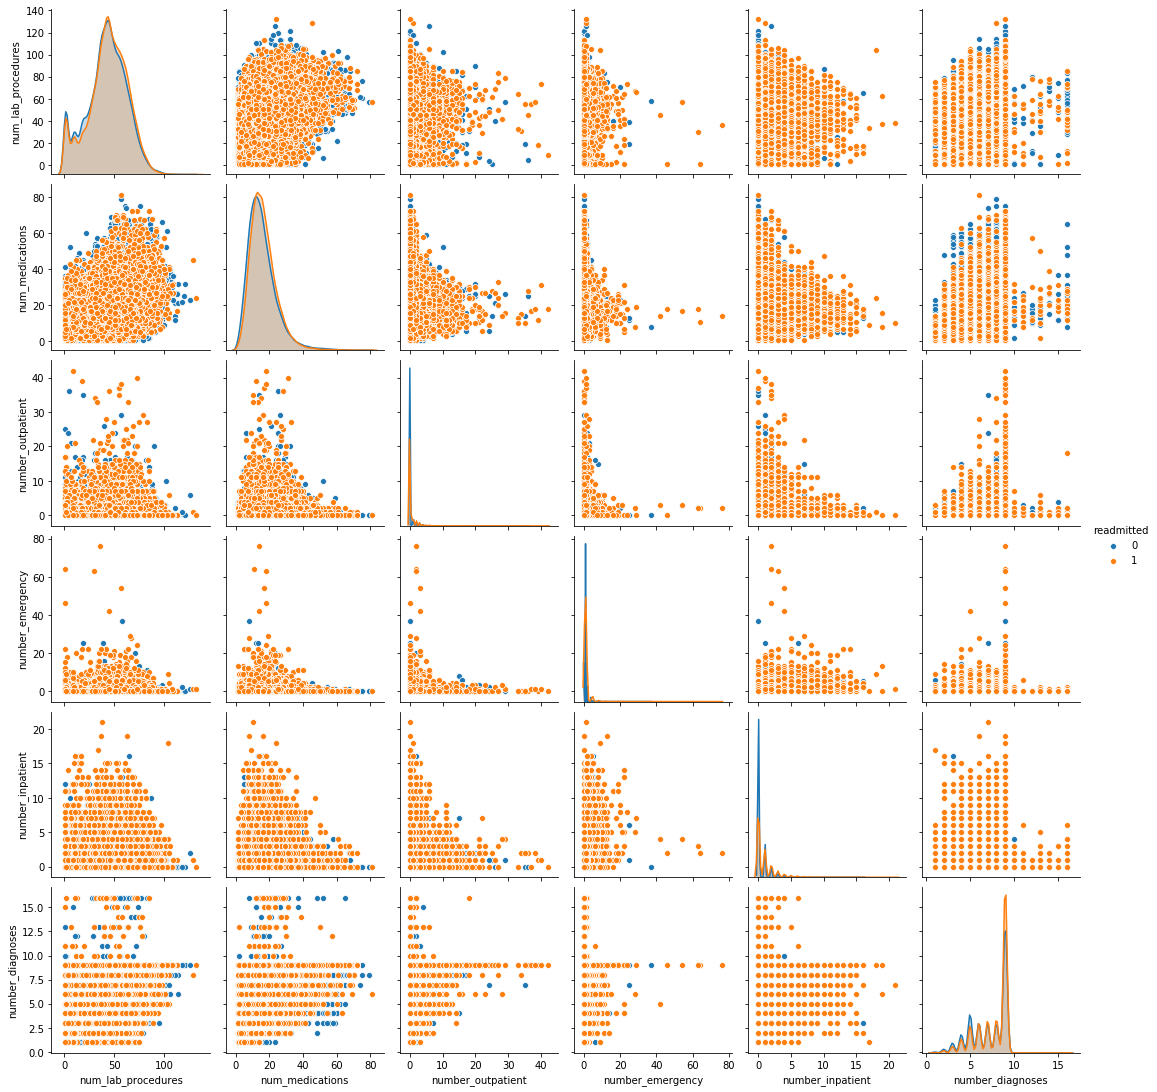

In [45]:
sns.pairplot(diabetes_data[['num_lab_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted']], hue='readmitted')

### Training Model

#### Libraries

In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neural_network import MLPClassifier

#### Seperating Dependent and Independent Variables

In [35]:
y = diabetes_data['readmitted']

In [40]:
X = diabetes_data.drop('readmitted', axis=1)

#### Scaling Values

In [41]:
scaler = MinMaxScaler()

In [42]:
X[:] = scaler.fit_transform(X[:])

#### Train Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, test_size=0.15)

#### 10-Fold Cross Validation

In [33]:
kfold = KFold(n_splits=10, random_state=358)

In [47]:
classif_scores = []

for idx, (train_idx, test_idx) in enumerate(kfold.split(X_train)):
    print('*'*25)
    print(f'Training Fold No: {idx+1}')
    train_X = X_train[train_idx]
    train_y = y_train[train_idx]
    
    test_X = X_train[test_idx]
    test_y = y_train[test_idx]
    
#     train_X = train_X.astype(np.float32)
#     test_X = test_X.astype(np.float32)
    
#     print(train_X.dtype)
    
    clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
    clf.fit(train_X, train_y)
    
    score = classification_report(test_y, clf.predict(test_X))
    
    print(score)
    print('*'*25)
    print()
    classif_scores.append(score)

*************************
Training Fold No: 1
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      4649
           1       0.60      0.50      0.54      4001

    accuracy                           0.62      8650
   macro avg       0.61      0.61      0.61      8650
weighted avg       0.62      0.62      0.61      8650

*************************

*************************
Training Fold No: 2
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4729
           1       0.60      0.51      0.55      3921

    accuracy                           0.62      8650
   macro avg       0.62      0.61      0.61      8650
weighted avg       0.62      0.62      0.62      8650

*************************

*************************
Training Fold No: 3
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      4650
           1       0.61      0.50      0.55  

#### Support Vector Classifier

In [50]:
classifier = SVC(verbose=1)
classifier.fit(X_train, y_train)

/home/praneet/venv/blackstraw/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=1)

In [52]:
svc_pred = classifier.predict(X_test)

In [55]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71      8229
           1       0.69      0.23      0.34      7036

    accuracy                           0.60     15265
   macro avg       0.64      0.57      0.53     15265
weighted avg       0.63      0.60      0.54     15265



In [98]:
print(f"ROC Score: {roc_auc_score(y_test, svc_pred)}")

ROC Score: 0.5703672141211378


#### Decision Tree Classifier

In [57]:
clf_dt = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
dt_pred = clf_dt.predict(X_test)

In [59]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      8229
           1       0.53      0.49      0.51      7036

    accuracy                           0.57     15265
   macro avg       0.56      0.56      0.56     15265
weighted avg       0.56      0.57      0.56     15265



In [99]:
print(f"ROC Score: {roc_auc_score(y_test, dt_pred)}")

ROC Score: 0.5609554763789317


#### Logistic Regression

In [61]:
clf_lr = LogisticRegression(n_jobs=-1)
clf_lr.fit(X_train, y_train)

/home/praneet/venv/blackstraw/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praneet/venv/blackstraw/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lr_pred = clf_lr.predict(X_test)

In [63]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69      8229
           1       0.64      0.42      0.51      7036

    accuracy                           0.62     15265
   macro avg       0.63      0.61      0.60     15265
weighted avg       0.62      0.62      0.61     15265



In [100]:
print(f"ROC Score: {roc_auc_score(y_test, lr_pred)}")

ROC Score: 0.6068290114461599


#### XGBoost Classifier

In [74]:
clf_xgboost = XGBClassifier(n_jobs=-1, max_depth=10)
clf_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
boost_pred = clf_xgboost.predict(X_test)

In [76]:
print(classification_report(y_test, boost_pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      8229
           1       0.62      0.51      0.56      7036

    accuracy                           0.63     15265
   macro avg       0.63      0.62      0.62     15265
weighted avg       0.63      0.63      0.62     15265



In [101]:
print(f"ROC Score: {roc_auc_score(y_test, boost_pred)}")

ROC Score: 0.6198600106073925


#### AdaBoost Classifier

In [87]:
adaboost = AdaBoostClassifier(learning_rate=0.1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)

In [88]:
adaboost_pred = adaboost.predict(X_test)

In [89]:
print(classification_report(y_test, adaboost_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.69      8229
           1       0.62      0.43      0.51      7036

    accuracy                           0.62     15265
   macro avg       0.62      0.60      0.60     15265
weighted avg       0.62      0.62      0.60     15265



In [103]:
print(f"ROC Score: {roc_auc_score(y_test, adaboost_pred)}")

ROC Score: 0.6031693177202798
